In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
probes = ['probeC', 'probeD', 'probeF', 'probeE', 'probeB', 'probeA']
session_ids = [767871931, 771990200, 778240327, 778998620, 786091066,
            794812542, 831882777, 839068429, 847657808, 840012044,
            766640955, 768515987, 771160300, 774875821, 779839471,
            781842082, 787025148, 789848216, 793224716, 816200189,
            819186360, 819701982, 821695405, 829720705, 835479236]

In [5]:
# FIGURE 2C
ll = np.load('..\data\LL_states.npy', allow_pickle=True).item()
sel_metric = np.zeros((len(session_ids), 14))
stim = 'natural_movie_one_more_repeats'
state_range = ll[session_ids[0], stim][:, 0]


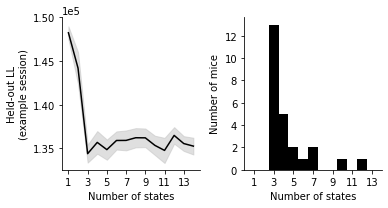

In [35]:
ll_example_session = np.load('..\data\LL_states_771990200.npy', allow_pickle = True).item()[(771990200, stim)]

fig, ax = plt.subplots(1, 2, figsize = (5.5, 3))

x = state_range
y = np.nanmean(-ll_example_session, axis = 0)
yerr = np.nanstd(-ll_example_session, axis = 0)/np.sqrt(ll_example_session.shape[0])
ax[0].plot(x, y, color = 'k')
ax[0].fill_between(x, y + yerr, y-yerr, alpha = 0.5, color = 'silver', ls = 'None')
ax[0].set_ylabel('Held-out LL\n(example session)')
ax[0].set_xlabel('States')
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

current_yticks = ax[0].get_yticks()  
alternate_yticks = current_yticks[1::2] 
ax[0].set_yticks(alternate_yticks) 

ax[0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))  
ax[0].set_xticks(x[::2])

for s_no, session_id in enumerate(session_ids):
    sel_metric[s_no] = -ll[session_id, stim][:, 1]
    
    
norm_LL = np.array([(l - np.nanmin(l))/(np.nanmax(l) - np.nanmin(l)) for l in sel_metric]).T
op_states = []
for l in norm_LL.T:
    op_states.append(x[np.argmax(np.diff(np.diff(l))) + 2])
op_state = max(set(op_states), key = op_states.count)

unique, counts = np.unique(op_states, return_counts=True)
ax[1].bar(unique, counts, color = 'k',width = 1)
ax[1].set_xlim(0, 14)
ax[1].set_xticks(x[::2])
ax[1].set_ylabel('Number of mice')

for i in range(2): 
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(True)
    ax[i].spines['left'].set_visible(True)
    ax[i].set_xlabel('Number of states')
plt.tight_layout()
# plt.savefig('num_states_control.pdf')